In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
#  Reading the data in
df = pd.read_csv("real_estate_data.csv")

In [38]:
## Clean data from NaN
df = df.dropna(axis = 0, how = 'any')

In [39]:
# take a look at the dataset
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
5   5.21  28.7  


In [40]:
# summarize the data
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean     3.690136   11.460660   11.000863    0.068528    0.553215    6.280015   
std      9.202423   23.954082    6.908364    0.252971    0.113112    0.697985   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.081955    0.000000    5.130000    0.000000    0.453000    5.879250   
50%      0.268880    0.000000    8.560000    0.000000    0.538000    6.201500   
75%      3.435973   12.500000   18.100000    0.000000    0.624000    6.605500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean    68.932741    3.805268    9.403553  406.431472   18.537563   12.769112   
std     27.888705    2.0985

In [41]:
# Let's select some features to explore more.
cdf = df[['CRIM','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','LSTAT','MEDV']]
print(cdf.head(9))

       CRIM  INDUS    NOX     RM    AGE     DIS  TAX  PTRATIO  LSTAT  MEDV
0   0.00632   2.31  0.538  6.575   65.2  4.0900  296     15.3   4.98  24.0
1   0.02731   7.07  0.469  6.421   78.9  4.9671  242     17.8   9.14  21.6
2   0.02729   7.07  0.469  7.185   61.1  4.9671  242     17.8   4.03  34.7
3   0.03237   2.18  0.458  6.998   45.8  6.0622  222     18.7   2.94  33.4
5   0.02985   2.18  0.458  6.430   58.7  6.0622  222     18.7   5.21  28.7
7   0.14455   7.87  0.524  6.172   96.1  5.9505  311     15.2  19.15  27.1
8   0.21124   7.87  0.524  5.631  100.0  6.0821  311     15.2  29.93  16.5
10  0.22489   7.87  0.524  6.377   94.3  6.3467  311     15.2  20.45  15.0
11  0.11747   7.87  0.524  6.009   82.9  6.2267  311     15.2  13.27  18.9


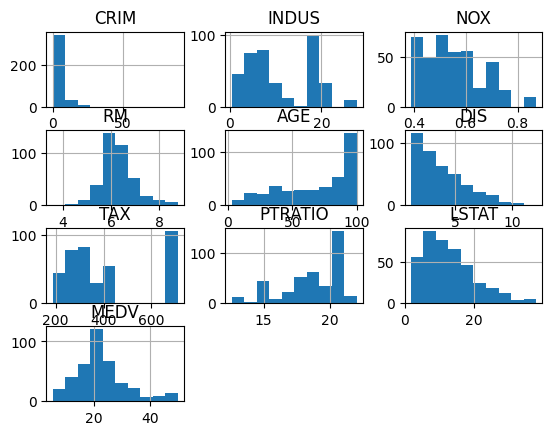

In [42]:
# We can plot each of these features:
viz = cdf[['CRIM','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','LSTAT','MEDV']]
viz.hist()
plt.show()

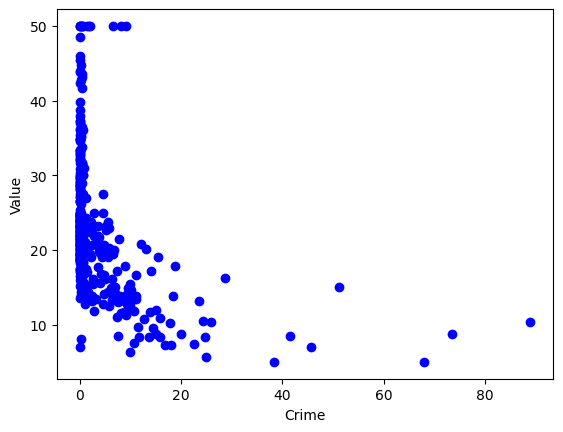

In [43]:
# Now, let's plot each of these features against the Emission, to see how linear their relationship is:Now, let's plot each of these features against the Emission, to see how linear their relationship is:

plt.scatter(cdf.CRIM, cdf.MEDV,  color='blue')
plt.xlabel("Crime")
plt.ylabel("Value")
plt.show()

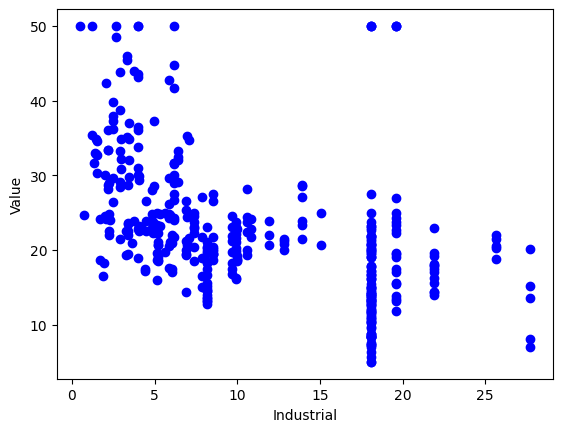

In [44]:
plt.scatter(cdf.INDUS, cdf.MEDV,  color='blue')
plt.xlabel("Industrial")
plt.ylabel("Value")
plt.show()

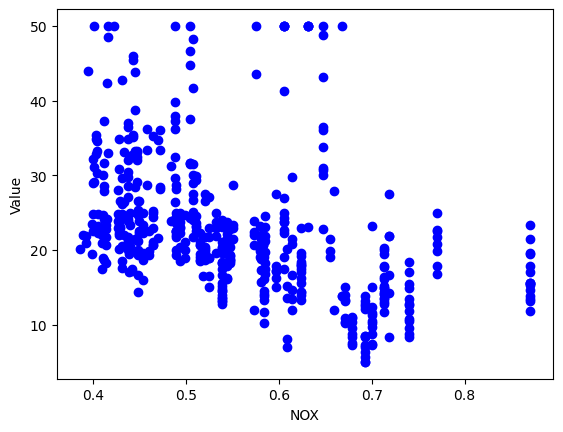

In [29]:
plt.scatter(cdf.NOX, cdf.MEDV,  color='blue')
plt.xlabel("NOX")
plt.ylabel("Value")
plt.show()

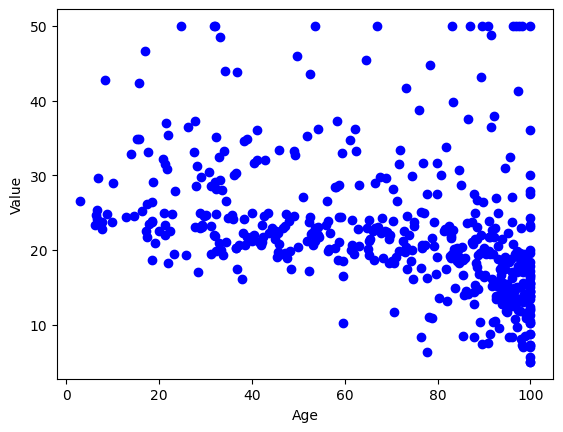

In [30]:
plt.scatter(cdf.AGE, cdf.MEDV,  color='blue')
plt.xlabel("Age")
plt.ylabel("Value")
plt.show()

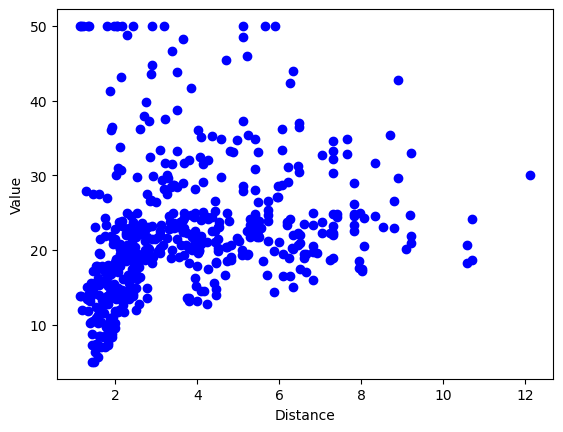

In [31]:
plt.scatter(cdf.DIS, cdf.MEDV,  color='blue')
plt.xlabel("Distance")
plt.ylabel("Value")
plt.show()

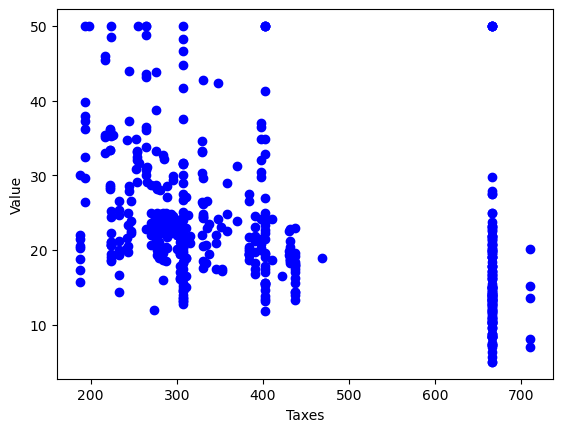

In [32]:
plt.scatter(cdf.TAX, cdf.MEDV,  color='blue')
plt.xlabel("Taxes")
plt.ylabel("Value")
plt.show()

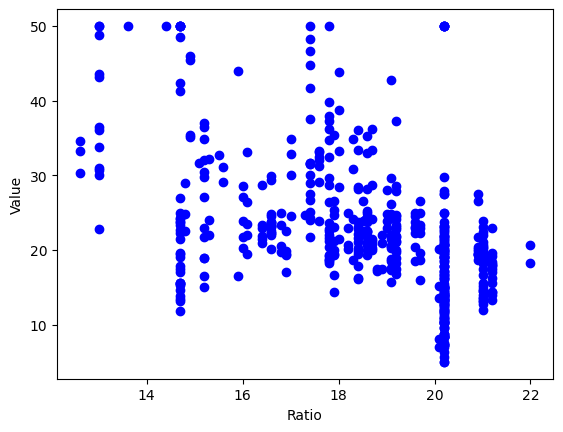

In [33]:
plt.scatter(cdf.PTRATIO, cdf.MEDV,  color='blue')
plt.xlabel("Ratio")
plt.ylabel("Value")
plt.show()

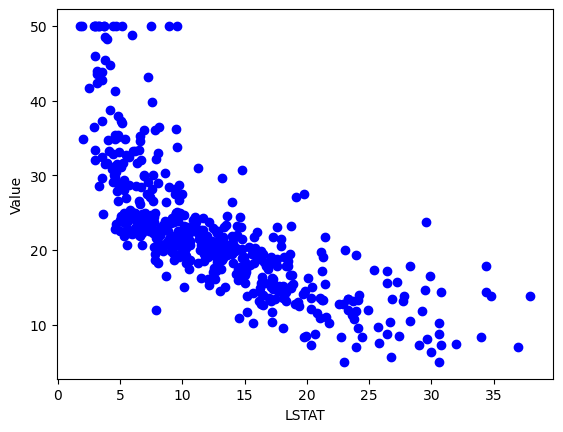

In [34]:
plt.scatter(cdf.LSTAT, cdf.MEDV,  color='blue')
plt.xlabel("LSTAT")
plt.ylabel("Value")
plt.show()

In [45]:
# Creating train and test dataset
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

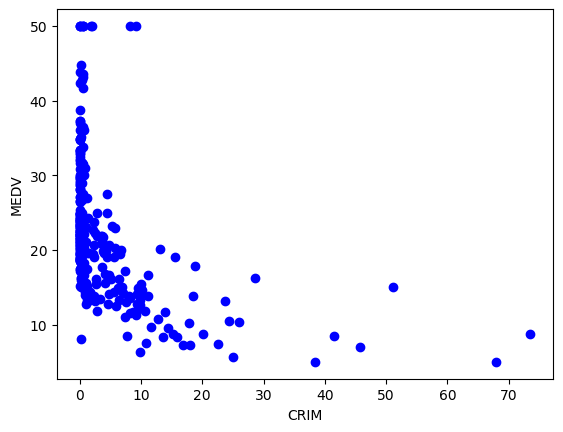

In [46]:
# Train data distribution
plt.scatter(train.CRIM, train.MEDV,  color='blue')
plt.xlabel("CRIM")
plt.ylabel("MEDV")
plt.show()

In [47]:
# Modeling
# Using sklearn package to model data.
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CRIM']])
train_y = np.asanyarray(train[['MEDV']])
regr.fit(train_x, train_y)

LinearRegression()

In [48]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.44100851]]
Intercept:  [23.6434856]


Text(0, 0.5, 'MEDV')

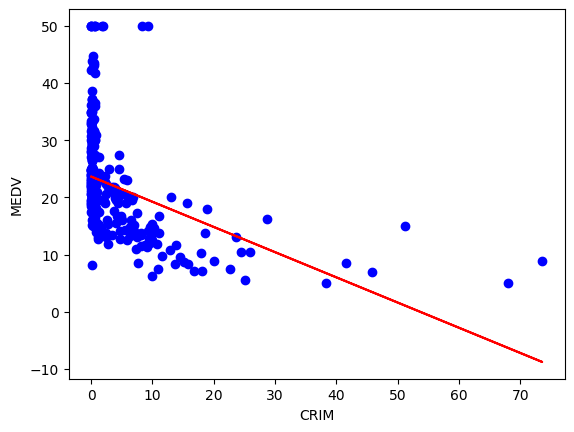

In [49]:
# Plot outputs
plt.scatter(train.CRIM, train.MEDV,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("CRIM")
plt.ylabel("MEDV")

In [50]:
# Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['CRIM']])
test_y = np.asanyarray(test[['MEDV']])
test_y_ = regr.predict(test_x)

In [51]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 6.85
Residual sum of squares (MSE): 94.68
R2-score: 0.02


In [18]:
# Exercise

# Lets see what the evaluation metrics are if we trained a regression model using the FUELCONSUMPTION_COMB feature.

# Start by selecting FUELCONSUMPTION_COMB as the train_x data from the train dataframe, then select
#FUELCONSUMPTION_COMB as the test_x data from the test dataframe

In [52]:
train_x = train[['INDUS']] 

test_x = test[['INDUS']] 

In [53]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.67830428]]
Intercept:  [29.5471364]


Text(0, 0.5, 'MEDV')

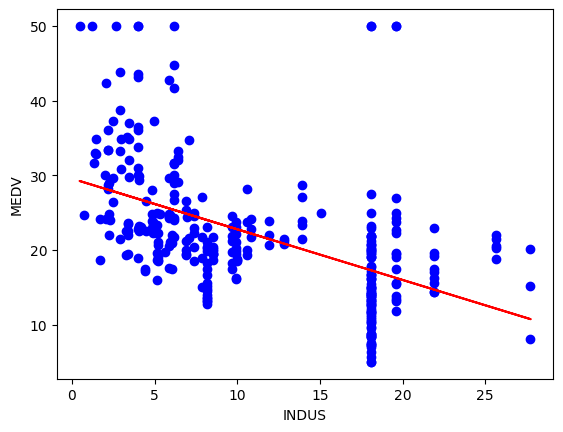

In [54]:
# Plot outputs
plt.scatter(train.INDUS, train.MEDV,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("INDUS")
plt.ylabel("MEDV")

In [55]:
predictions = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean absolute error: 6.02


In [56]:

train_x = train[['NOX']] 

test_x = test[['NOX']] 

In [57]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-36.3991841]]
Intercept:  [42.30439602]


Text(0, 0.5, 'MEDV')

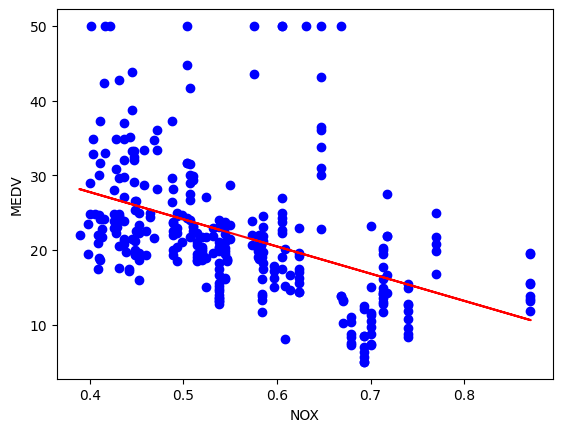

In [58]:
# Plot outputs
plt.scatter(train.NOX, train.MEDV,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("NOX")
plt.ylabel("MEDV")

In [59]:
predictions = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean absolute error: 6.33


Coefficients:  [[9.03289265]]
Intercept:  [-34.30132159]
Mean absolute error: 4.52


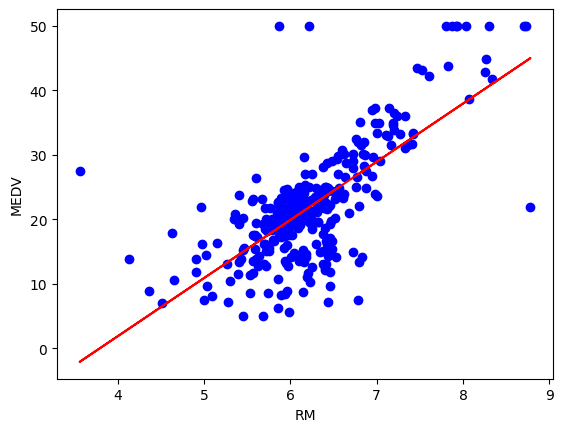

In [61]:
train_x = train[['RM']] 

test_x = test[['RM']] 
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Plot outputs
plt.scatter(train.RM, train.MEDV,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("RM")
plt.ylabel("MEDV")

predictions = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Coefficients:  [[-0.13217737]]
Intercept:  [31.16356412]
Mean absolute error: 6.11


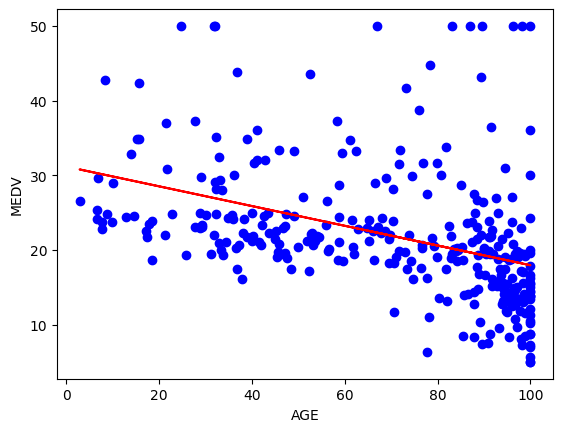

In [62]:
train_x = train[['AGE']] 

test_x = test[['AGE']] 
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Plot outputs
plt.scatter(train.AGE, train.MEDV,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("AGE")
plt.ylabel("MEDV")

predictions = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Coefficients:  [[1.2312463]]
Intercept:  [17.40831551]
Mean absolute error: 6.76


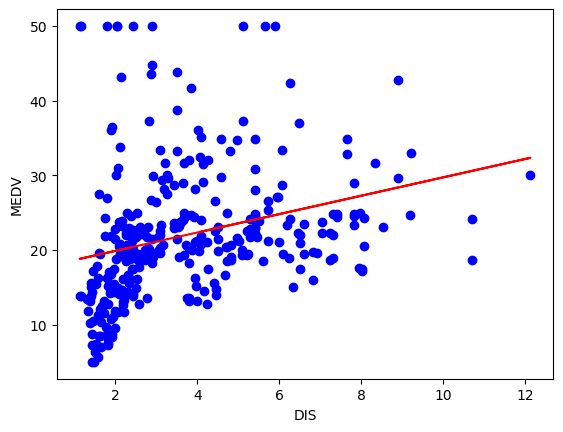

In [63]:
train_x = train[['DIS']] 

test_x = test[['DIS']] 
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Plot outputs
plt.scatter(train.DIS, train.MEDV,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("DIS")
plt.ylabel("MEDV")

predictions = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Coefficients:  [[-0.02714635]]
Intercept:  [33.1205971]
Mean absolute error: 6.27


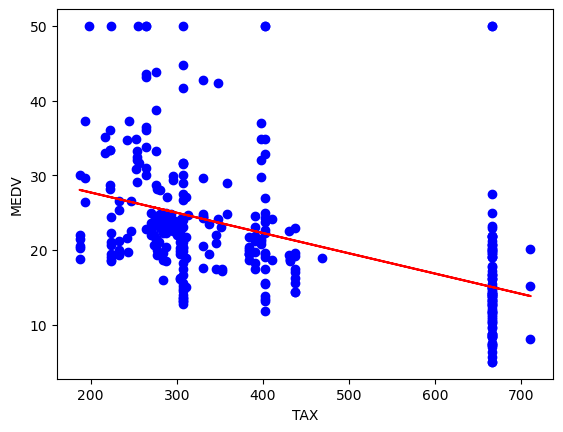

In [64]:
train_x = train[['TAX']] 

test_x = test[['TAX']] 
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Plot outputs
plt.scatter(train.TAX, train.MEDV,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("TAX")
plt.ylabel("MEDV")

predictions = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Coefficients:  [[-2.28603205]]
Intercept:  [64.47447684]
Mean absolute error: 6.28


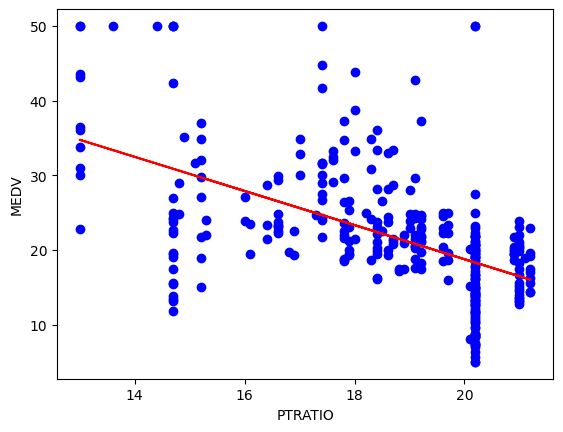

In [65]:
train_x = train[['PTRATIO']] 

test_x = test[['PTRATIO']] 
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Plot outputs
plt.scatter(train.PTRATIO, train.MEDV,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")

predictions = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Coefficients:  [[-0.89452776]]
Intercept:  [33.67974467]
Mean absolute error: 4.90


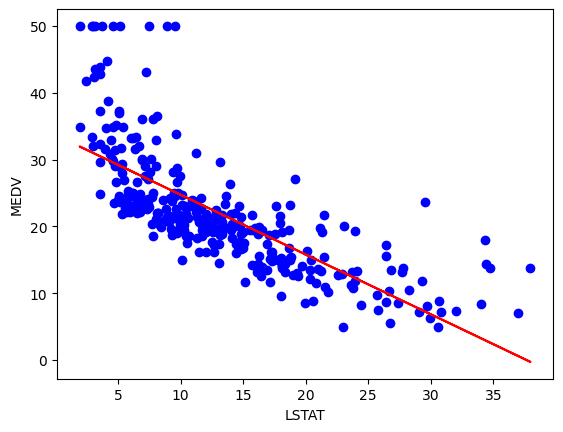

In [66]:
train_x = train[['LSTAT']] 

test_x = test[['LSTAT']] 
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Plot outputs
plt.scatter(train.LSTAT, train.MEDV,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

predictions = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))